# "Matplotlib" & “Seaborn Mastery with Student Performance Real Dataset”

# Seaborn Section

Learn & Execution Plan:

Plot Types -

1. Histplot, Kdeplot, Rugplot (Distribution Plot)
2. Scatterplot, Lineplot, Relplot (Relationship Plot)
3. Pairplot (Pairwise Relationship)
4. Lmplot
5. FacetGrid, Catplot
6. Heatmap

In [1]:
from google.colab import drive
drive.mount('/content//drive')

Mounted at /content//drive


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Histogram + KDE Plot (math score)

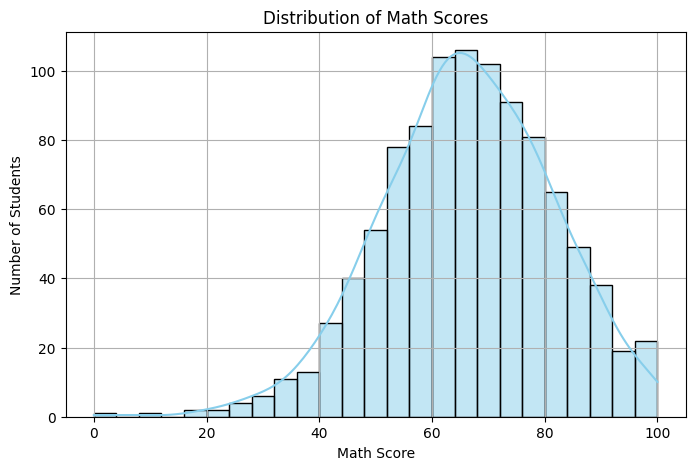

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()



Subplot — All subject`s distribution at a time

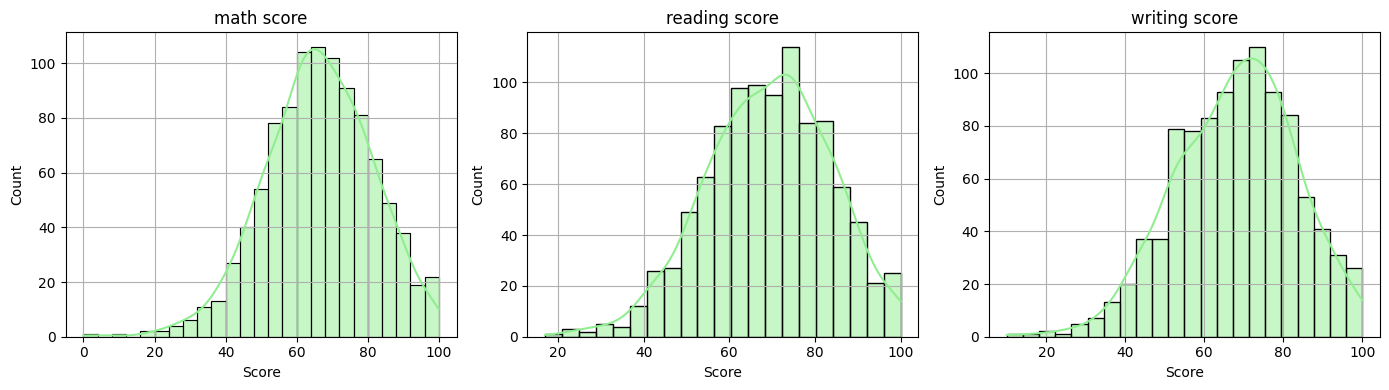

In [20]:
scores = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(14, 4))

for i, score in enumerate(scores):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[score], kde=True, color='lightgreen')
    plt.title(score)
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.grid(True)

plt.tight_layout()
plt.show()



Rugplot

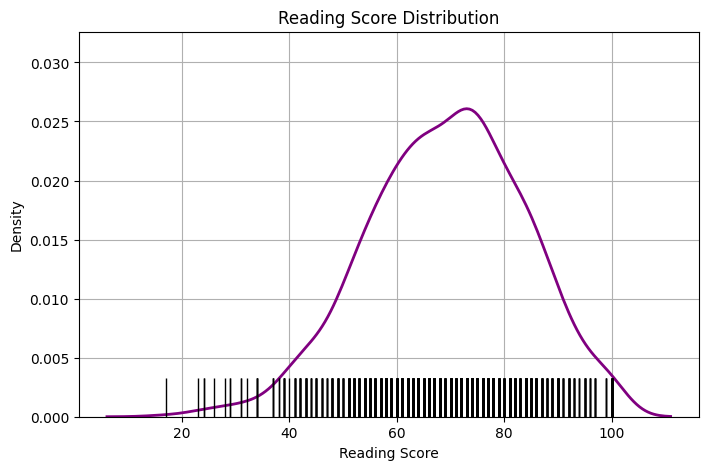

In [21]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['reading score'], color='purple', linewidth=2)
sns.rugplot(df['reading score'], height=0.1, color='black')
plt.title("Reading Score Distribution")
plt.xlabel("Reading Score")
plt.grid(True)
plt.show()


Scatter Plot – Math vs Reading



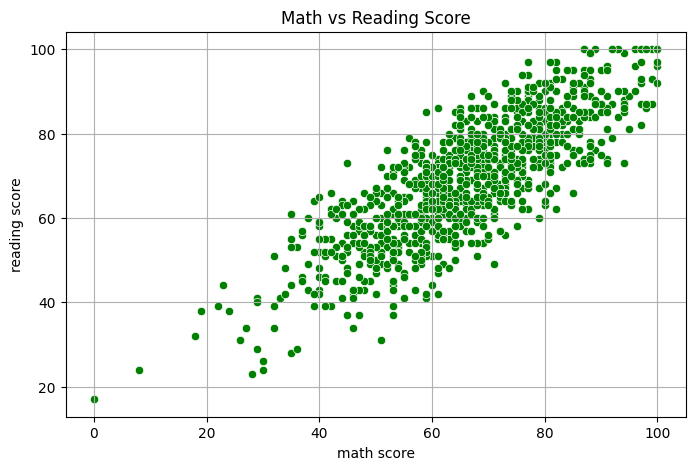

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x = 'math score', y = 'reading score', color = 'green')
plt.title("Math vs Reading Score")
plt.grid(True)
plt.show()


 Scatter + Hue (gender > color)

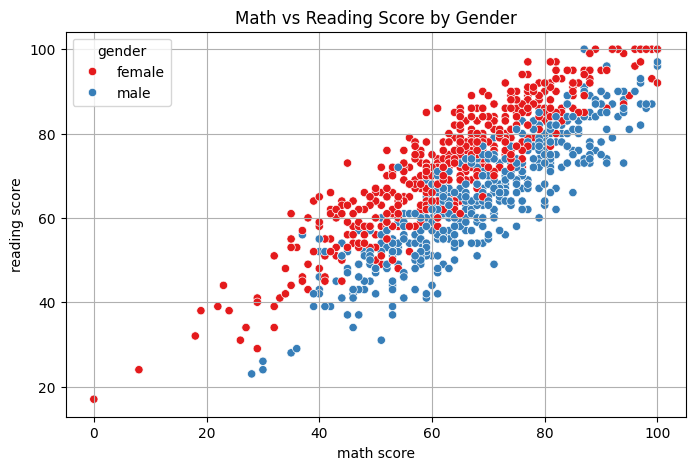

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x = 'math score', y = 'reading score', hue = 'gender', palette = 'Set1')
plt.title("Math vs Reading Score by Gender")
plt.grid(True)
plt.show()



 Line Plot – Score > trend (writing score sorted)

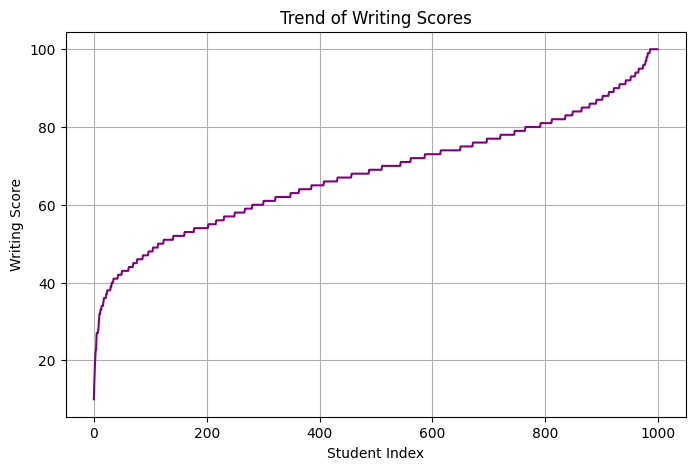

In [24]:
sorted_df = df.sort_values(by='writing score')

plt.figure(figsize=(8,5))
sns.lineplot(data=sorted_df, x = range(len(sorted_df)), y = 'writing score', color = 'purple')
plt.title("Trend of Writing Scores")
plt.xlabel("Student Index")
plt.ylabel("Writing Score")
plt.grid(True)
plt.show()



Relplot

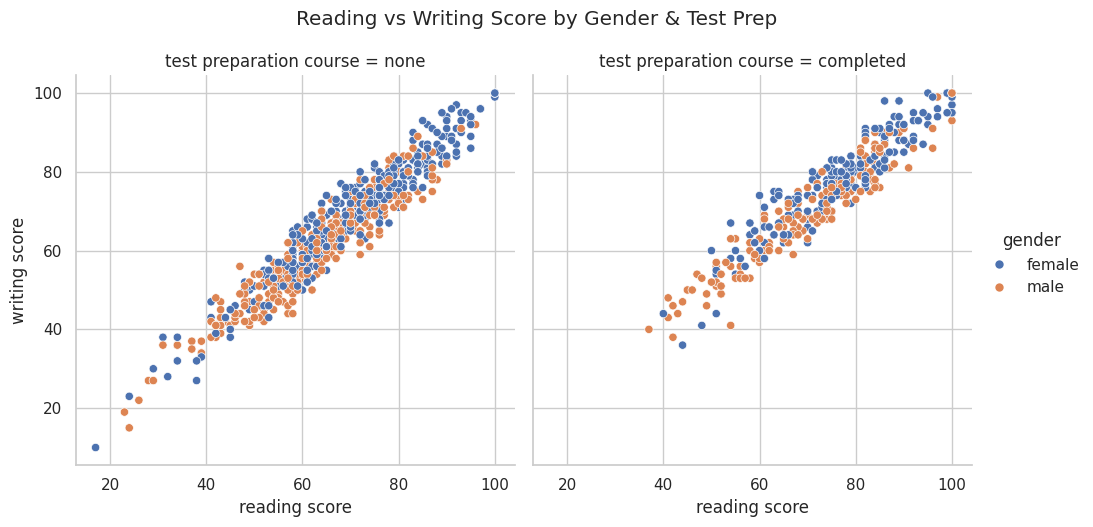

In [25]:
sns.set(style='whitegrid')

plot = sns.relplot(
    data=df,
    x='reading score',
    y='writing score',
    hue='gender',
    col='test preparation course',
    height=5,
    aspect=1
)

plot.fig.suptitle("Reading vs Writing Score by Gender & Test Prep", y=1.05)
plt.show()

 Pairplot – Numeric columns

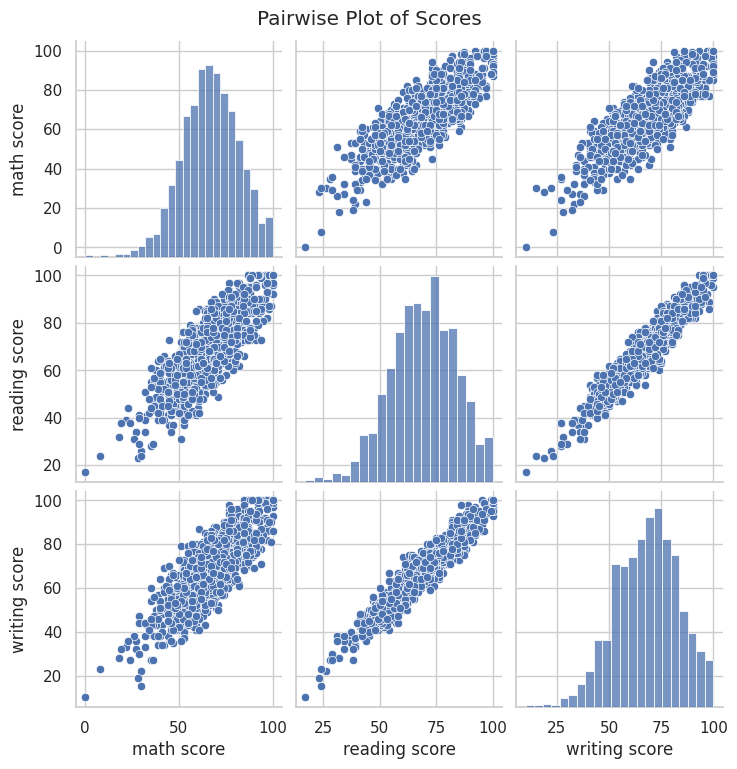

In [26]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Pairwise Plot of Scores", y=1.02)
plt.show()


Pairplot with Hue (Gender-wise)

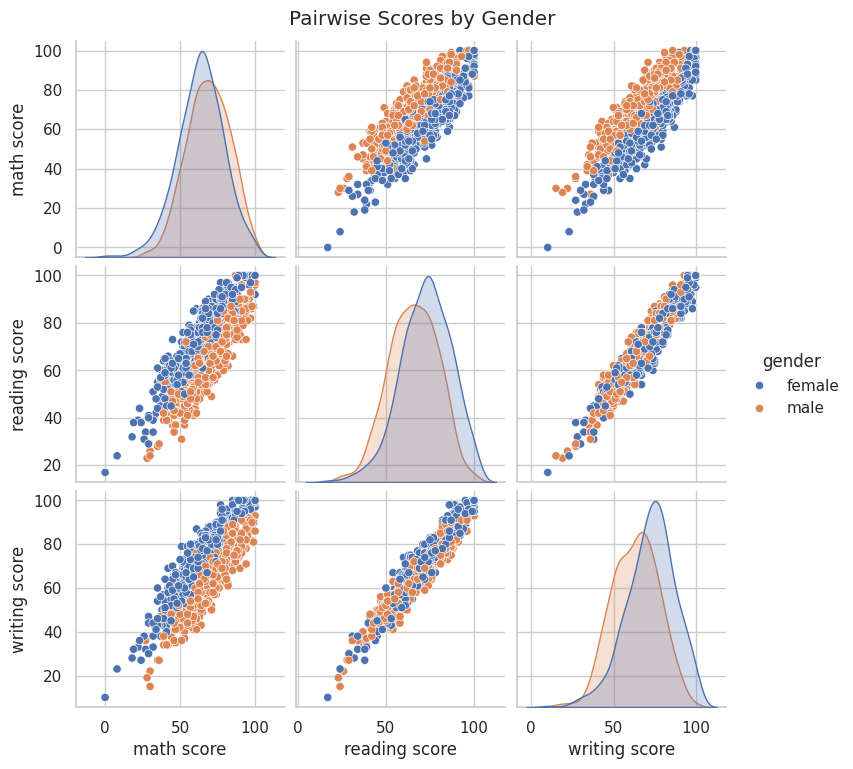

In [27]:
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender')
plt.suptitle("Pairwise Scores by Gender", y=1.02)
plt.show()


 KDE Diagonal (More smooth & elegant)

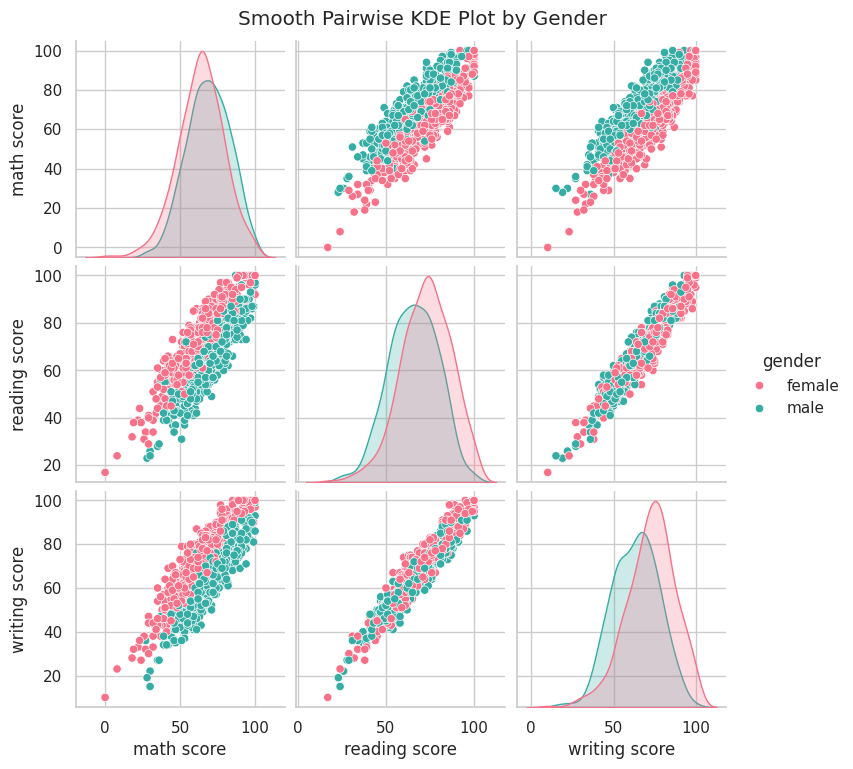

In [28]:
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']],
             hue = 'gender', diag_kind='kde', palette='husl')
plt.suptitle("Smooth Pairwise KDE Plot by Gender", y=1.02)
plt.show()


**Extra**

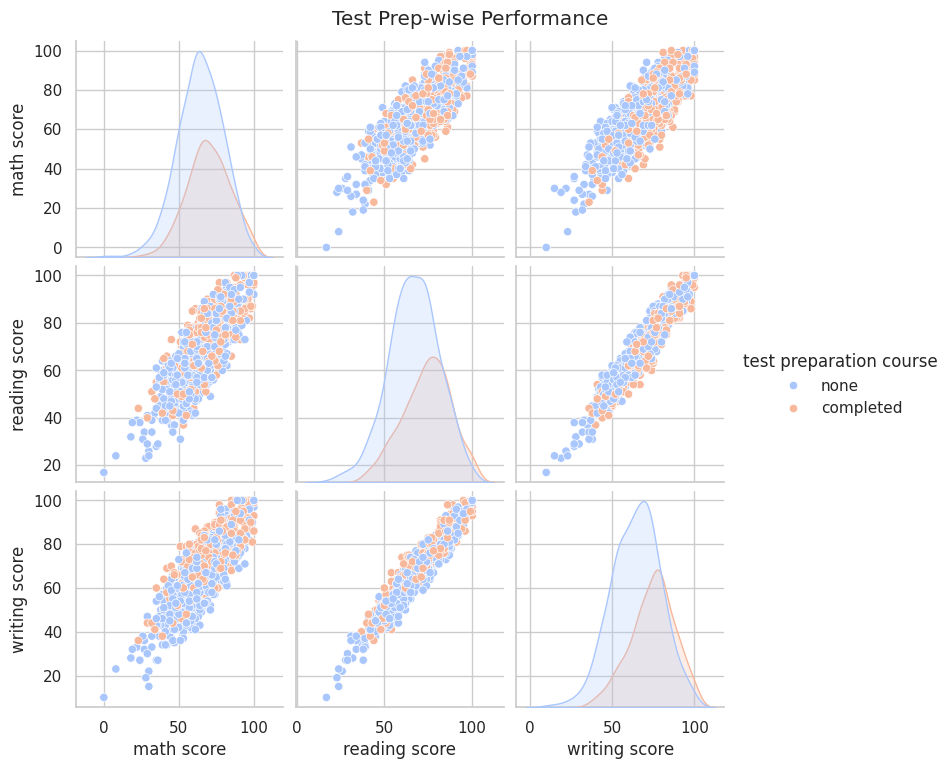

In [29]:
sns.pairplot(
    df[['math score', 'reading score', 'writing score', 'gender', 'test preparation course']],
    hue='test preparation course',
    diag_kind='kde',
    palette='coolwarm'
)
plt.suptitle("Test Prep-wise Performance", y=1.02)
plt.show()


lmplot() – Regression with Relationship

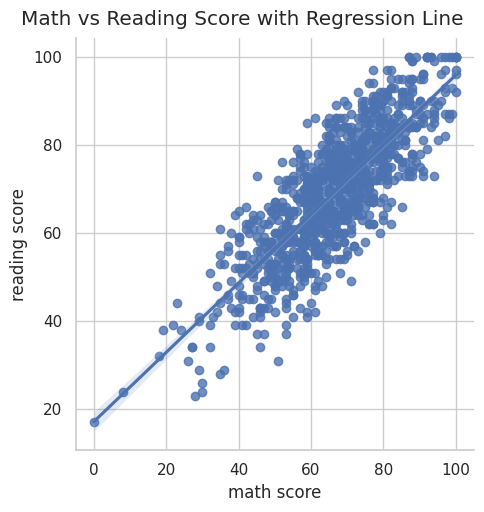

In [30]:
sns.lmplot(data=df, x = 'math score', y = 'reading score')
plt.suptitle("Math vs Reading Score with Regression Line", y=1.02)
plt.grid(True)
plt.show()


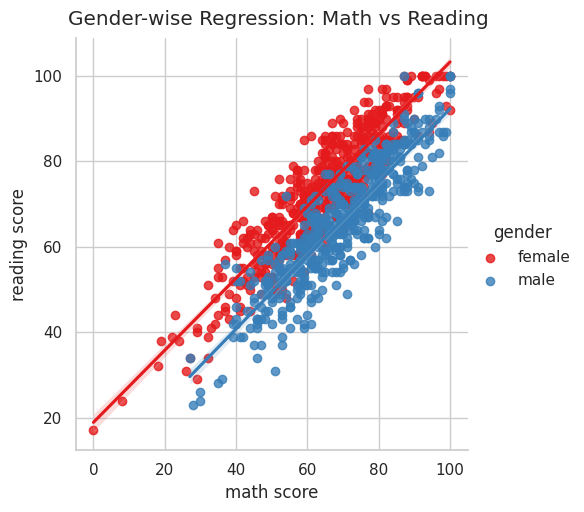

In [32]:
sns.lmplot(data=df, x='math score', y='reading score', hue='gender', palette='Set1')    # focus...."hue"=gender.....
plt.suptitle("Gender-wise Regression: Math vs Reading", y=1.02)
plt.grid(True)
plt.show()


For more advanced view:

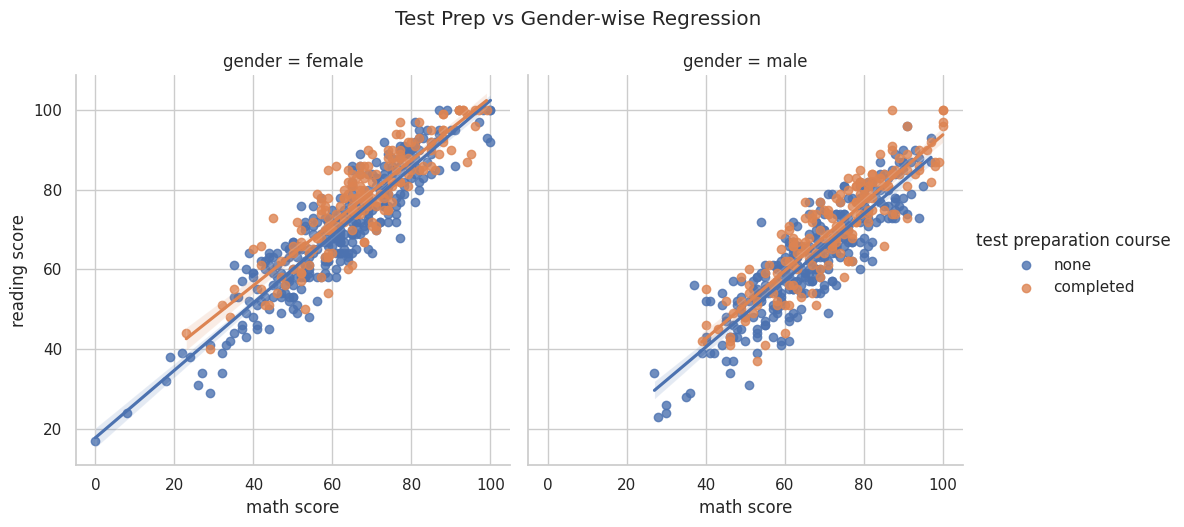

In [33]:
sns.lmplot(data=df,
           x='math score',
           y='reading score',
           hue='test preparation course',
           col='gender',
           height=5,
           aspect=1)

plt.suptitle("Test Prep vs Gender-wise Regression", y=1.05)
plt.grid(True)
plt.show()



Extra

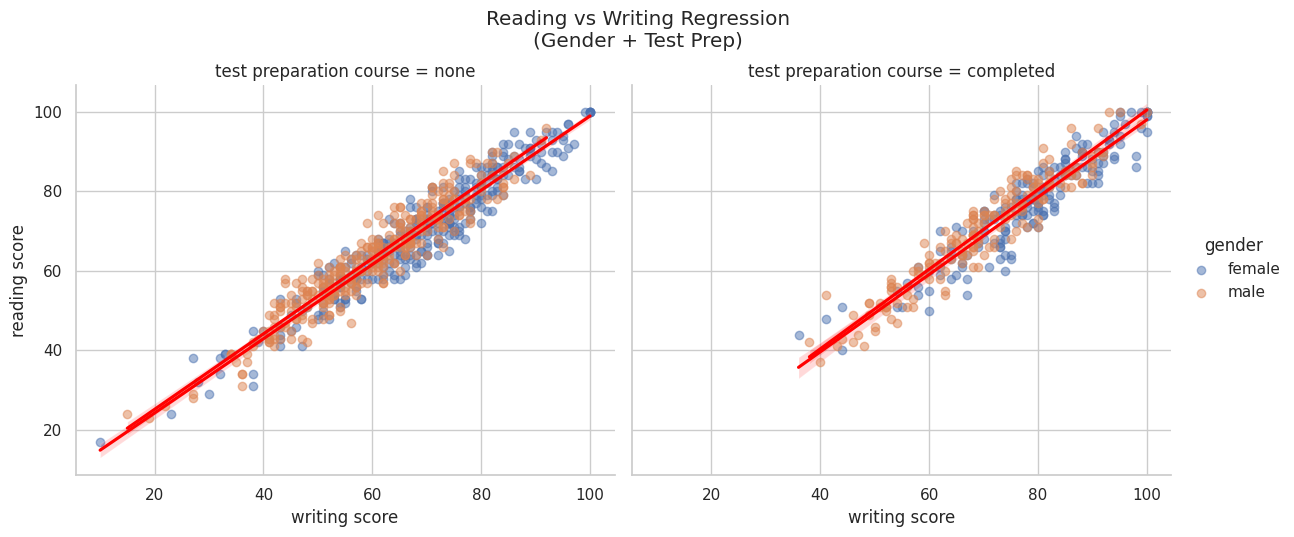

In [34]:
sns.lmplot(data=df,
           x='writing score',
           y='reading score',
           hue='gender',
           col='test preparation course',
           height=5,
           aspect=1.2,
           scatter_kws={'alpha':0.5},
           line_kws={'color':'red'})

plt.suptitle("Reading vs Writing Regression\n(Gender + Test Prep)", y=1.07)
plt.show()


FacetGrid & catplot


 Dashboards-style visualization using categories


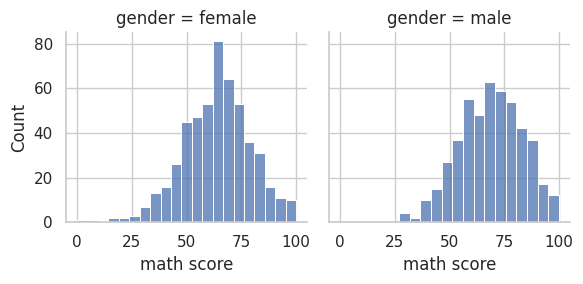

In [35]:
g = sns.FacetGrid(df, col='gender')
g.map(sns.histplot, 'math score')


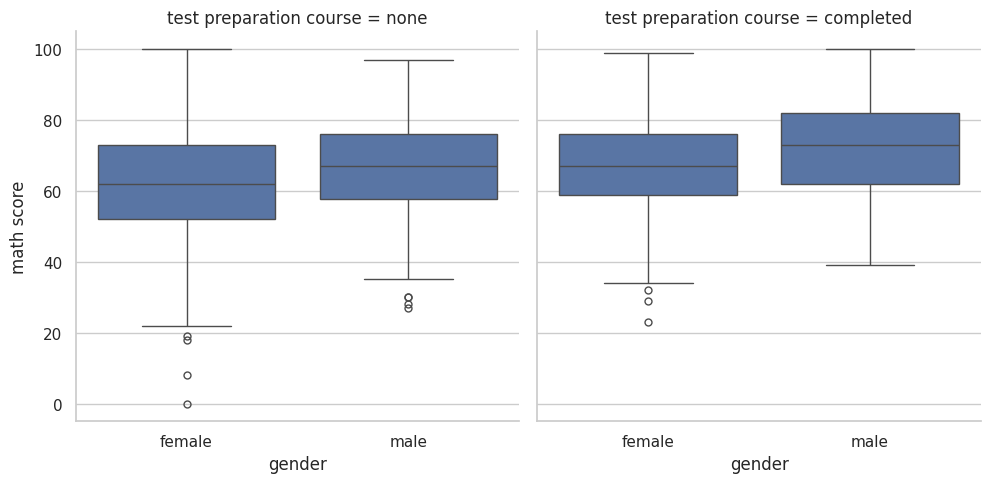

In [36]:
sns.catplot(data=df, x='gender', y='math score',
            kind='box', col='test preparation course')




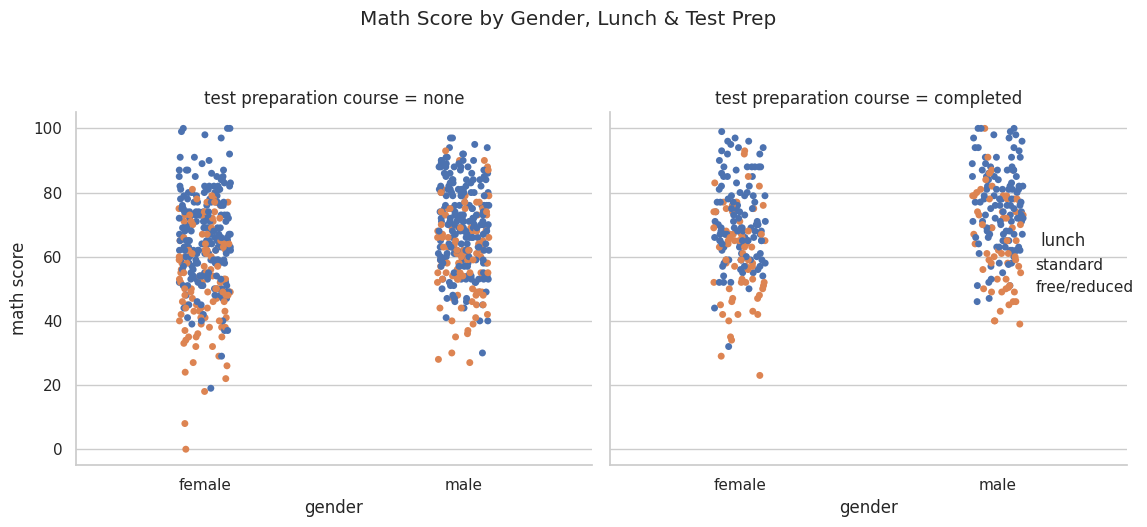

In [37]:
sns.catplot(data = df,
           x = 'gender',
           y = 'math score',
           hue = 'lunch',
           col = 'test preparation course',
           height = 5,
           aspect = 1)
plt.suptitle("Math Score by Gender, Lunch & Test Prep", y=1.05)
plt.tight_layout()
plt.show()


Heatmap of Correlation Between Subjects

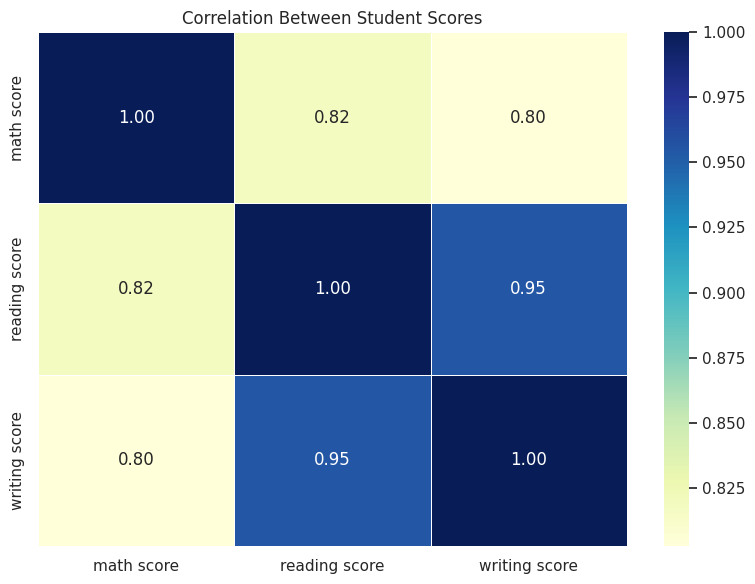

In [38]:
score_data = df[['math score', 'reading score', 'writing score']]

corr = score_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")

plt.title('Correlation Between Student Scores')
plt.tight_layout()
plt.show()

# Matplotlib Section
Learn & Execution Plan:

Plot Types -

1. Bar Plot
2. Box Plot
3. Pie Chart
4. Grouped Bar Plot
5. 3D Scatter Plot
6. Histogram

 Bar Plot – Average Scores by Gender

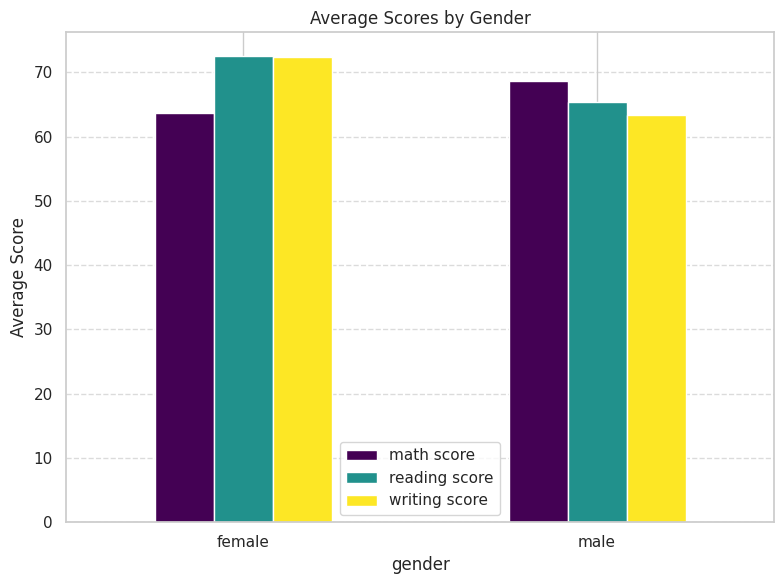

In [39]:
avg_scores_gender = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

avg_scores_gender.plot(kind="bar", figsize=(8, 6), colormap="viridis")
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

 Box Plot – Score Distribution by Test Preparation Course

/tmp/ipython-input-44-1207638592.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(
/tmp/ipython-input-44-1207638592.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(
/tmp/ipython-input-44-1207638592.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(


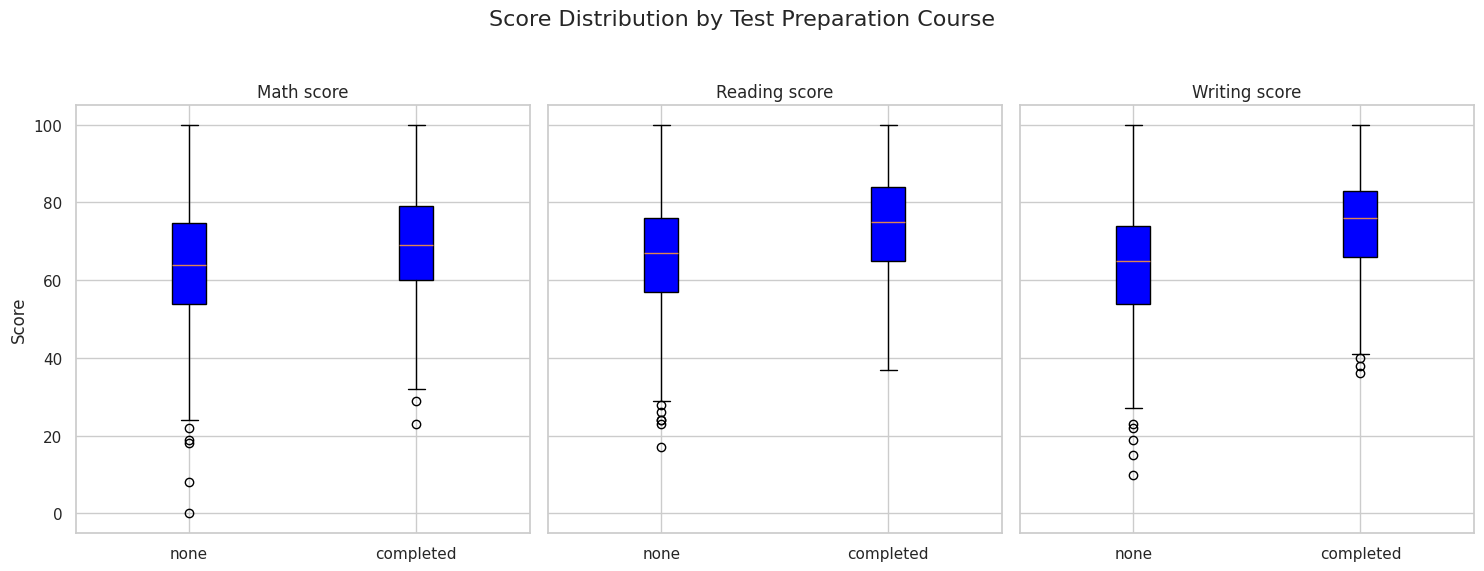

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

subjects = ["math score", "reading score", "writing score"]

for i, subject in enumerate(subjects):
    bp = axes[i].boxplot(
        [df[df["test preparation course"] == cat][subject] for cat in df["test preparation course"].unique()],
        patch_artist=True,
        labels=df["test preparation course"].unique()
    )
    for box in bp['boxes']:
        box.set(facecolor='blue')

    axes[i].set_title(f"{subject.capitalize()}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Score" if i == 0 else "")

plt.suptitle("Score Distribution by Test Preparation Course", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Pie Chart – Test Prepararion Course Distribution or choose any category

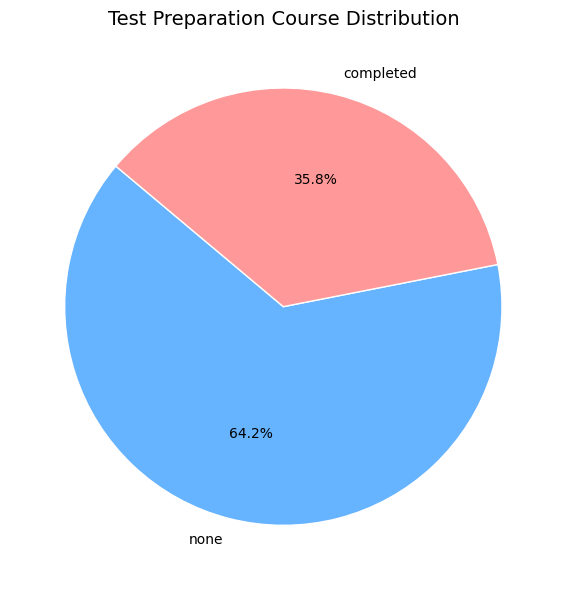

In [8]:
gender_counts = df["test preparation course"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140,
        colors=["#66b3ff", "#ff9999"], wedgeprops=dict(edgecolor='white'))

plt.title("Test Preparation Course Distribution", fontsize=14)
plt.tight_layout()

plt.show()

 Grouped Bar Plot – Average Scores by Parental Education Level

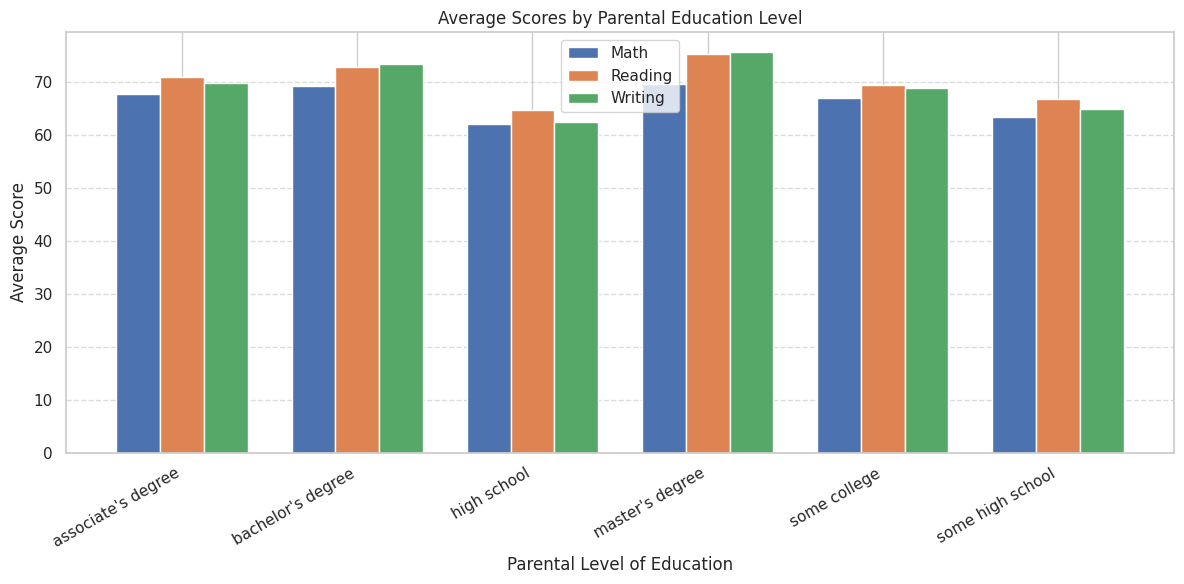

In [47]:
grouped = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()

grouped = grouped.sort_index()

labels = grouped.index
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, grouped["math score"], width, label="Math")
bars2 = ax.bar(x, grouped["reading score"], width, label="Reading")
bars3 = ax.bar(x + width, grouped["writing score"], width, label="Writing")

ax.set_xlabel("Parental Level of Education")
ax.set_ylabel("Average Score")
ax.set_title("Average Scores by Parental Education Level")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()

3D Scatter Plot – Math vs Reading vs Writing Scores

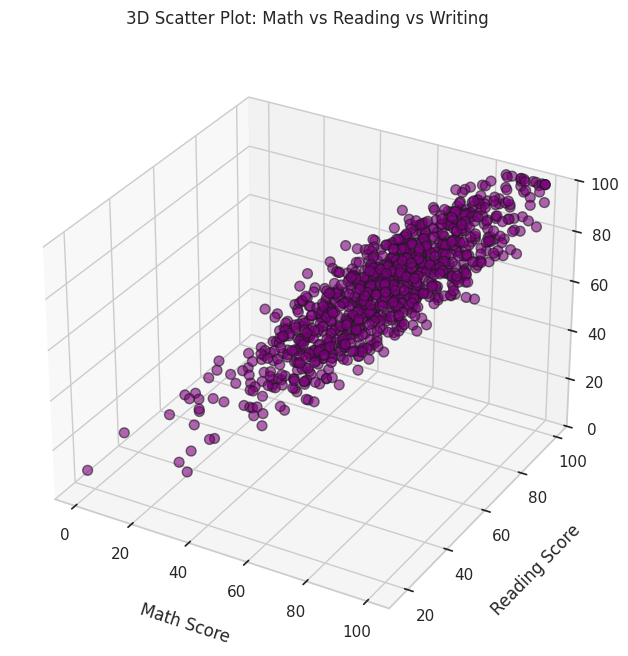

In [46]:
from mpl_toolkits.mplot3d import Axes3D

x = df["math score"]
y = df["reading score"]
z = df["writing score"]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='purple', alpha=0.6, edgecolor='k', s=50)

ax.set_xlabel("Math Score", labelpad=15)
ax.set_ylabel("Reading Score", labelpad=15)
ax.set_zlabel("Writing Score", labelpad=15)
ax.set_title("3D Scatter Plot: Math vs Reading vs Writing", pad=20)
ax.set_zlim(0, 100)

fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)

plt.show()


Histogram (Students Math Scores)

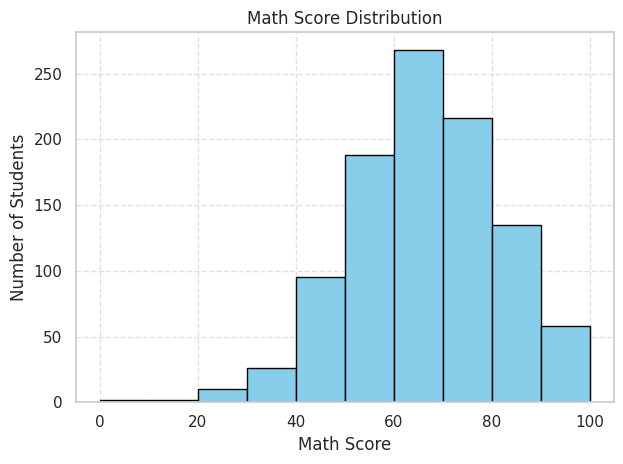

In [45]:
math_scores = df['math score'].astype(int)

plt.hist(math_scores, bins=10, edgecolor='black', color='skyblue')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
